# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [ ]:
'''
Advantages of using an area plot:
    Visualizes the relationship: An area plot helps to show the cumulative effect of both nitrate and phosphate levels over time, which might be useful if you want to highlight the total impact of both.
    Emphasizes the total trend: It gives a sense of the volume or amount covered by both variables combined over time.

Disadvantages:
    Hard to compare values: Area plots make it difficult to accurately compare the individual values of nitrate and phosphate, as the areas overlap.
    Can be misleading: If the values of the two variables are significantly different, one might dominate the area plot, obscuring the other.

Adjustments to improve the presentation:
    Separate graphs: Using two line graphs allows for clear comparison of each variable without interference from the other.
    Stacked Area Plot: If you still prefer to use an area plot, a stacked area plot can be a good solution, as it shows both variables while keeping them distinguishable.
    Adjust transparency: If sticking with an area plot, reducing the opacity (transparency) of the areas might help in visualizing both variables better.

'''

'\nAdvantages of using an area plot:\n\nVisualizes the relationship: An area plot helps to show the cumulative effect of both nitrate and phosphate levels over time, which might be useful if you want to highlight the total impact of both.\nEmphasizes the total trend: It gives a sense of the volume or amount covered by both variables combined over time.\nDisadvantages:\n\nHard to compare values: Area plots make it difficult to accurately compare the individual values of nitrate and phosphate, as the areas overlap.\nCan be misleading: If the values of the two variables are significantly different, one might dominate the area plot, obscuring the other.\nAdjustments to improve the presentation:\n\nSeparate graphs: Using two line graphs allows for clear comparison of each variable without interference from the other.\nStacked Area Plot: If you still prefer to use an area plot, a stacked area plot can be a good solution, as it shows both variables while keeping them distinguishable.\nAdjust 

In [11]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_3732/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

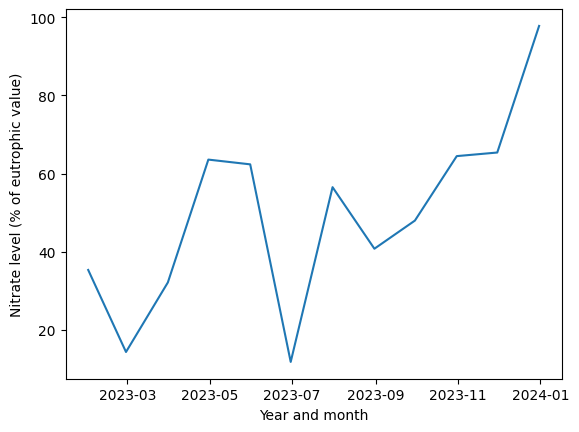

In [12]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_3732/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

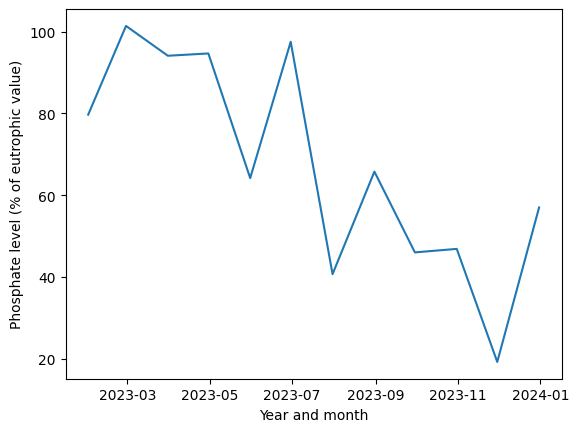

In [13]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

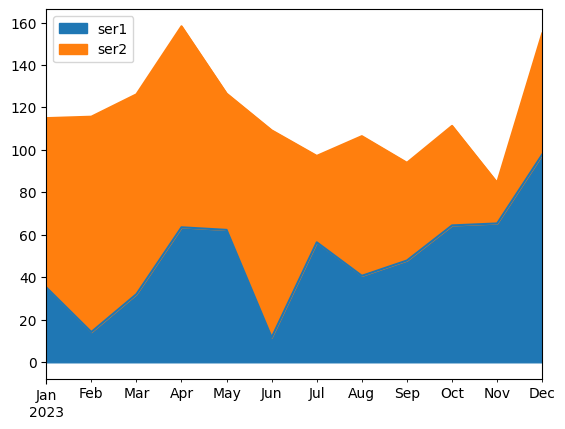

In [14]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [15]:
import pandas as pd

# Load the dataset
netflix_data = pd.read_csv('Best Show by Year Netflix.csv')

netflix_data.info()

numeric_data = netflix_data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()

# Display the correlation matrix
correlation_matrix

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TITLE              31 non-null     object 
 1   RELEASE_YEAR       31 non-null     int64  
 2   SCORE              31 non-null     float64
 3   NUMBER_OF_SEASONS  31 non-null     int64  
 4   MAIN_GENRE         31 non-null     object 
 5   MAIN_PRODUCTION    31 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.6+ KB


,RELEASE_YEAR,SCORE,NUMBER_OF_SEASONS
RELEASE_YEAR,1.000000,0.337341,-0.236380
SCORE,0.337341,1.000000,-0.142348
NUMBER_OF_SEASONS,-0.236380,-0.142348,1.000000


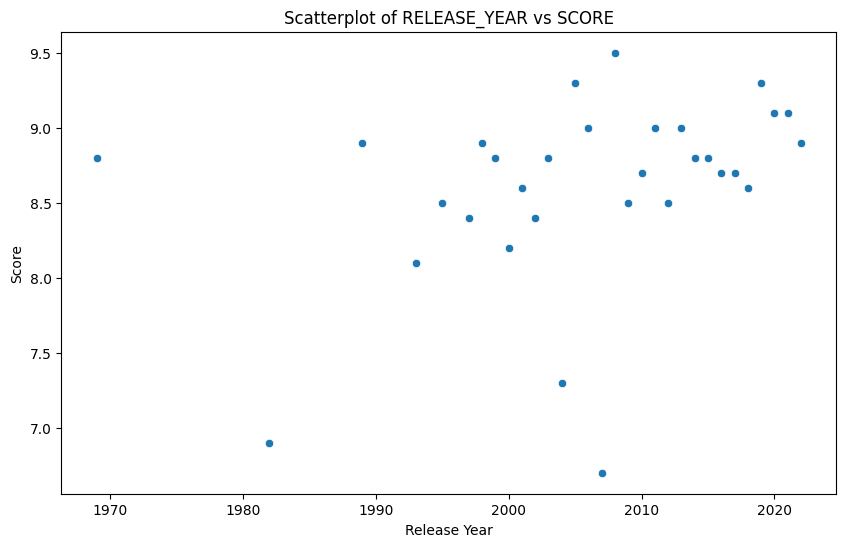

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=netflix_data, x="RELEASE_YEAR", y="SCORE")
plt.title("Scatterplot of RELEASE_YEAR vs SCORE")
plt.xlabel("Release Year")
plt.ylabel("Score")
plt.show()

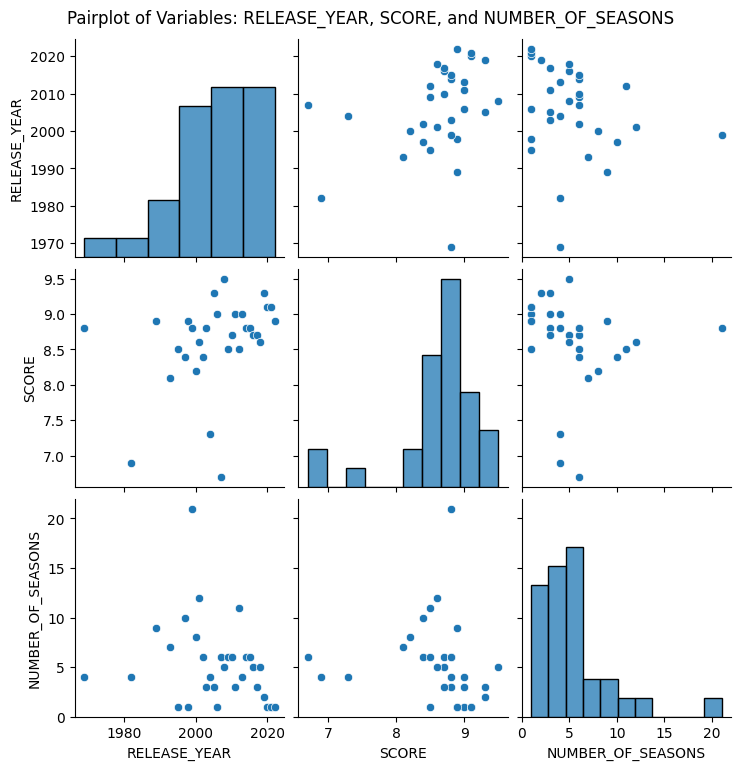

In [7]:
sns.pairplot(netflix_data[['RELEASE_YEAR', 'SCORE', 'NUMBER_OF_SEASONS']])
plt.suptitle("Pairplot of Variables: RELEASE_YEAR, SCORE, and NUMBER_OF_SEASONS", y=1.02)
plt.show()

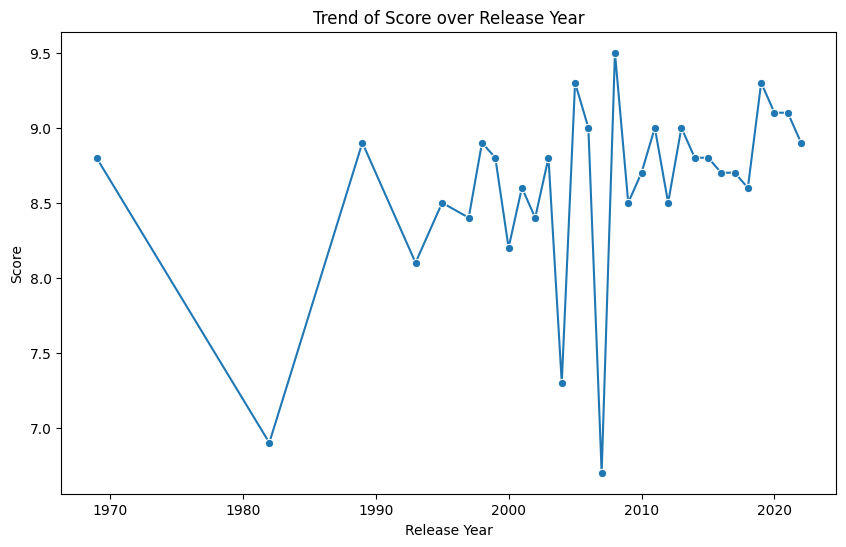

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=netflix_data, x="RELEASE_YEAR", y="SCORE", marker="o")
plt.title("Trend of Score over Release Year")
plt.xlabel("Release Year")
plt.ylabel("Score")
plt.show()

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

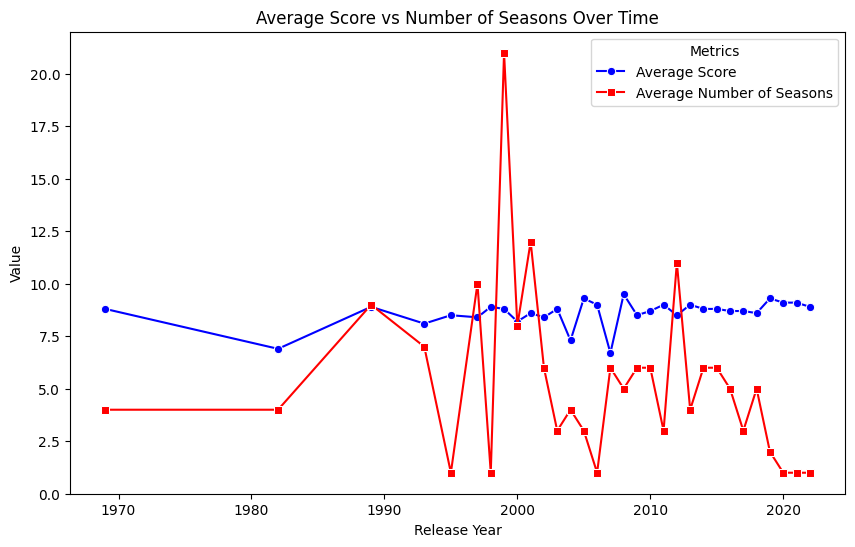

In [ ]:
#From Figure 3.17 in Story Telling With Data
yearly_data = netflix_data.groupby('RELEASE_YEAR')[['SCORE', 'NUMBER_OF_SEASONS']].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_data, x=yearly_data.index, y='SCORE', label="Average Score", marker='o', color='blue')
sns.lineplot(data=yearly_data, x=yearly_data.index, y='NUMBER_OF_SEASONS', label="Average Number of Seasons", marker='s', color='red')

plt.title('Average Score vs Number of Seasons Over Time')
plt.xlabel('Release Year')
plt.ylabel('Value')
plt.legend(title='Metrics')

plt.show()
